# Schrodinger's Equation

## References -- move to bottom
* Atkins & Friedman (Molecular Quantum Mechanics textbook)
* Barba, Lorena A., et al. "MAE 6286 Practical Numerical Methods with Python." The George Washington University. http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about. 2014
* http://arxiv.org/pdf/0704.3240.pdf
* http://phys.au.dk/fileadmin/site_files/publikationer/phd/Thomas_Kim_Kjeldsen.pdf

Wave functions are used in quantum mechanics to describe the position of a particle at a certain time. The fundamental equation used to solve these wave functions is the Schrodinger equation. 

\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi(x, t) = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}\psi(x, t)
\end{equation}

Discretized Equation:

\begin{eqnarray}
i\hbar\frac{\psi^{n+1}_i - \psi^n_i}{\Delta t} = \frac{\hbar^2}{2m} \cdot \frac{1}{2} &\left( 
\frac{\psi^{n+1}_{i+1} - 2\psi^{n+1}_i + \psi^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{\psi^n_{i+1}-2\psi^n_i + \psi^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

In [378]:
import numpy
from scipy.linalg import solve
from scipy.interpolate import spline
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [425]:
L = 1
nx = 51

h = 6.62607004e-34 #[m^2*kg/s]
hbar = h/(2*numpy.pi)
#hbar=1
m = 9.10938356e-31 #[kg] - mass of electron
dx = L/(nx-1)

a = hbar/(2*m)
#print(a)


psi_i = numpy.zeros(nx, dtype = numpy.complex)
psi_i[0] = 0.001

sigma = 9 #0.5
dt = (dx**2)/(a*sigma)
#dt=1e-5

nt = 10
print(hbar)
print(dt)

1.0545718001391127e-34
0.7678215774443214


In [426]:
def generateMatrix(N, sigma):
   
    ##We need a TRIDIAGONAL MATRIX!!

    # Set Diagonalfrom discritization
    #d = 2*numpy.diag(numpy.ones(N-2)*(1+1/sigma))
    d = -2*numpy.diag(numpy.ones(N-2)*(1/(dx**2)))
       
    # Set Upper Diagonal
    #ud = numpy.diag(numpy.ones(N-3)*-1j, 1)
    ud = numpy.diag(numpy.ones(N-3)*(-1/(dx**2)), 1)
        
    # Set Lower Diagonal
    #ld = numpy.diag(numpy.ones(N-3)*-1j, -1)
    ld = numpy.diag(numpy.ones(N-3)*(-1/(dx**2)), -1)
        
    A = d + ud + ld
    
    return A                   

In [427]:
#This is what we know

def genRHS(psi, sigma): 
    
    x = psi[1:-1]*2*(-1-1j/sigma) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    x[0] = psi[0]
    x[-1] = psi[0]
    
    return x

In [428]:
def CrankNicolson(psi, A, nt, sigma):
    
    for t in range(nt):
        psi_n = psi.copy()
        x = genRHS(psi_n, sigma)
        
        psi_inside = solve(A, x)
        psi[1:-1] = psi_inside
        
    return psi

In [429]:
A = generateMatrix(nx, sigma)

#print(A)

In [430]:
psi = CrankNicolson(psi_i.copy(), A, nt, sigma)

print(psi)

[  1.00000000e-03 +0.00000000e+00j  -4.23780004e-07 -2.14105362e-09j
   4.47560009e-07 +4.28210723e-09j  -4.70624610e-07 -6.37656091e-09j
   4.92937117e-07 +8.41902338e-09j  -5.14462039e-07 -1.04042533e-08j
   5.35165139e-07 +1.23271706e-08j  -5.55013488e-07 -1.41828678e-08j
   5.73975517e-07 +1.59666208e-08j  -5.92021070e-07 -1.76738990e-08j
   6.09121448e-07 +1.93003753e-08j  -6.25249457e-07 -2.08419355e-08j
   6.40379449e-07 +2.22946874e-08j  -6.54487365e-07 -2.36549692e-08j
   6.67550770e-07 +2.49193575e-08j  -6.79548893e-07 -2.60846744e-08j
   6.90462657e-07 +2.71479952e-08j  -7.00274706e-07 -2.81066539e-08j
   7.08969441e-07 +2.89582496e-08j  -7.16533037e-07 -2.97006512e-08j
   7.22953467e-07 +3.03320026e-08j  -7.28220525e-07 -3.08507262e-08j
   7.32325834e-07 +3.12555266e-08j  -7.35262870e-07 -3.15453934e-08j
   7.37026961e-07 +3.17196032e-08j  -7.37615303e-07 -3.17777215e-08j
   7.37026961e-07 +3.17196032e-08j  -7.35262870e-07 -3.15453934e-08j
   7.32325834e-07 +3.12555266e-08j

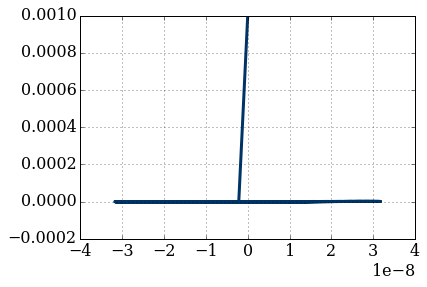

In [431]:
x = numpy.linspace(0,L,nx)

pyplot.plot(psi.imag, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

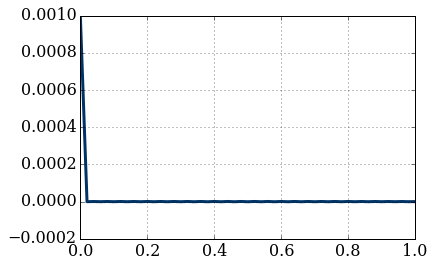

In [432]:
pyplot.plot(x, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

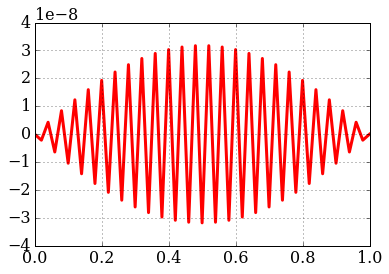

In [433]:
pyplot.plot(x, psi.imag, color='r', ls='-', lw=3);
pyplot.grid(True)

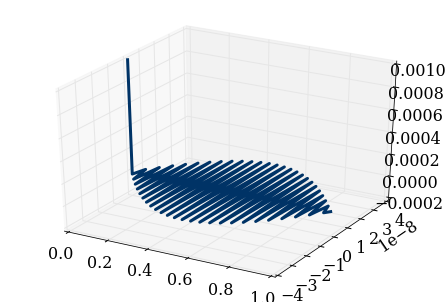

In [434]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init()

ax.plot(x, psi.imag, psi.real, color = '#003366', lw =3)


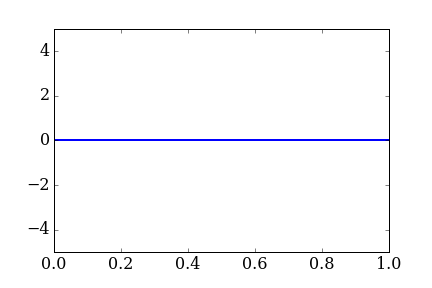
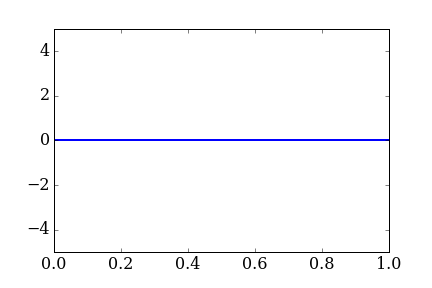
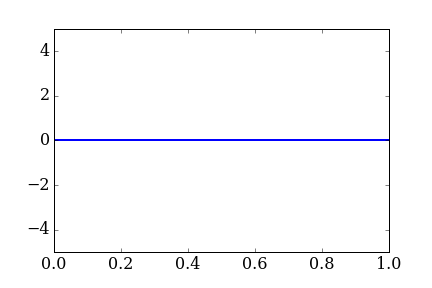
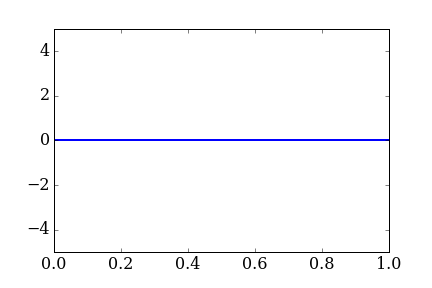
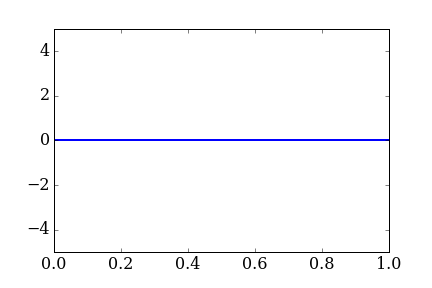
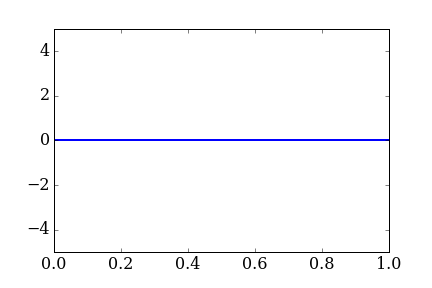
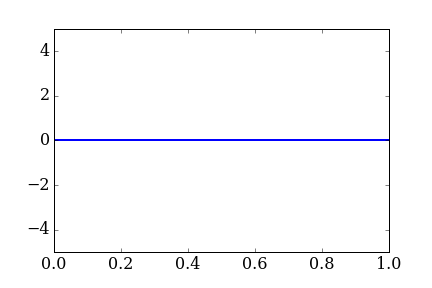
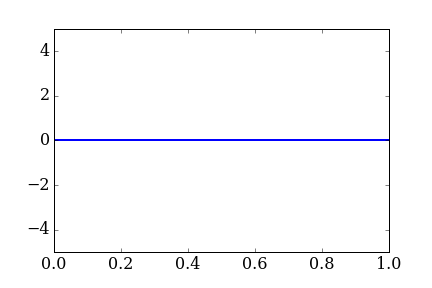
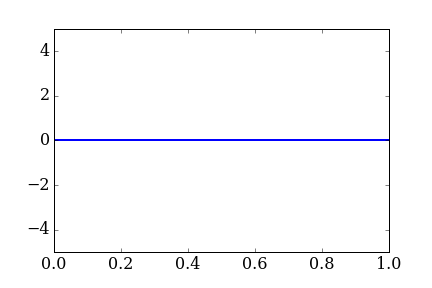
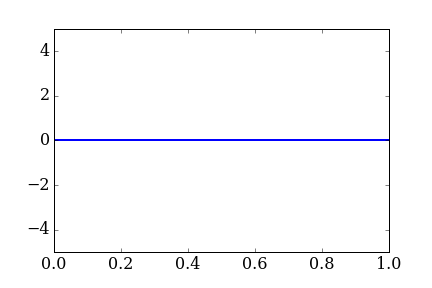
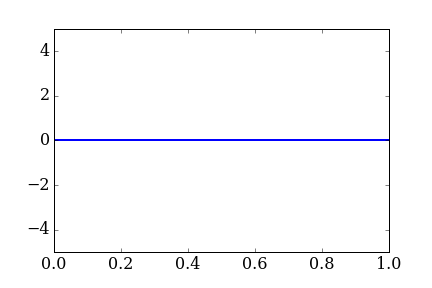
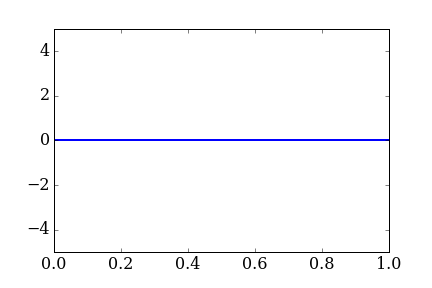
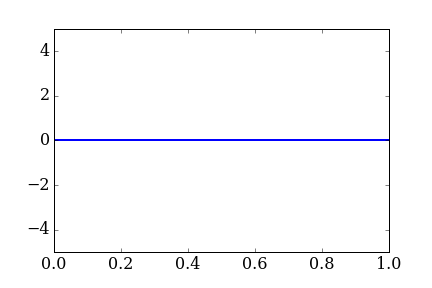
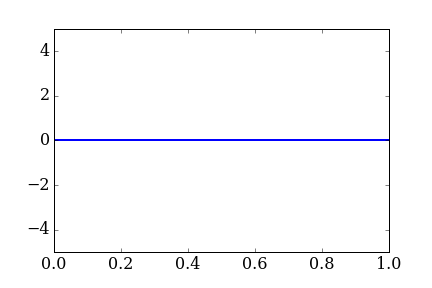
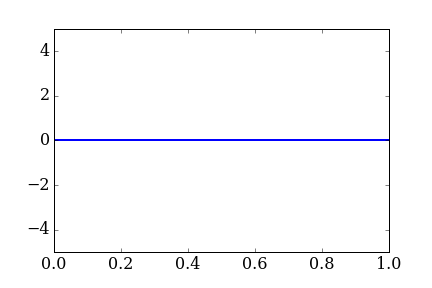
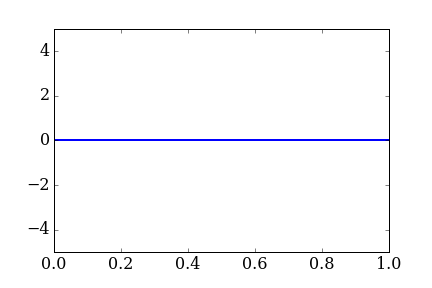
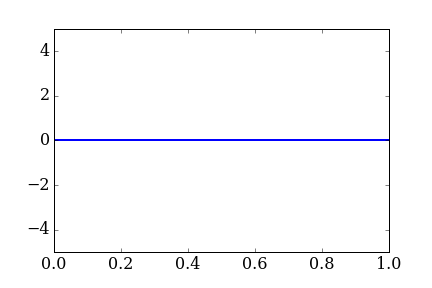
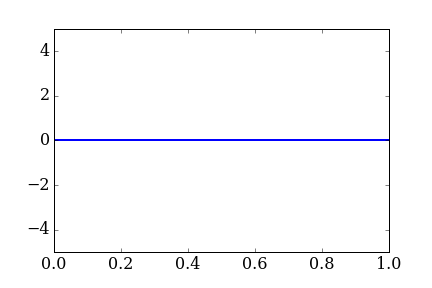
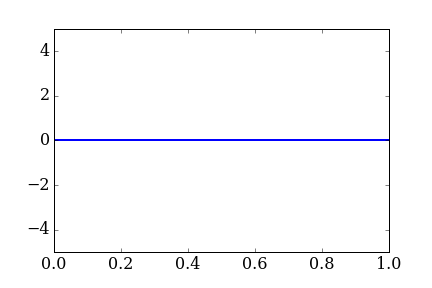
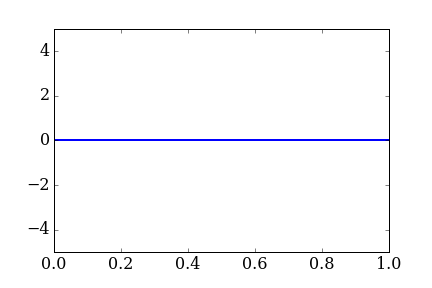
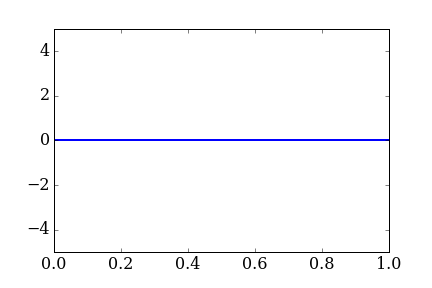
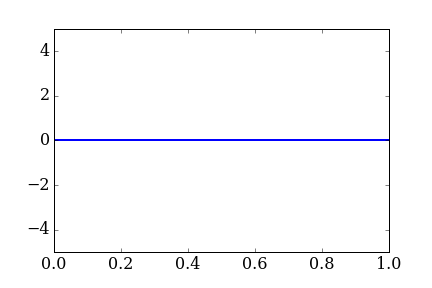
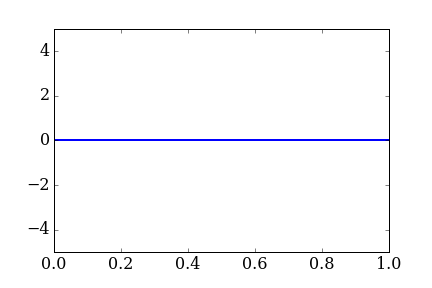
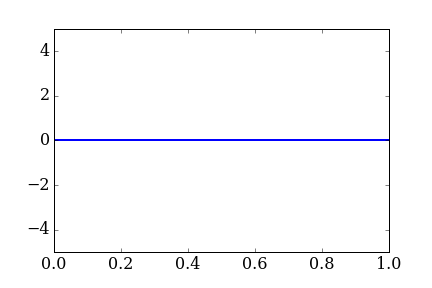
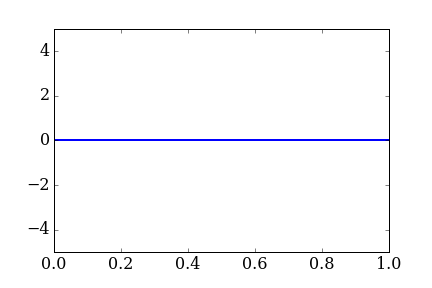
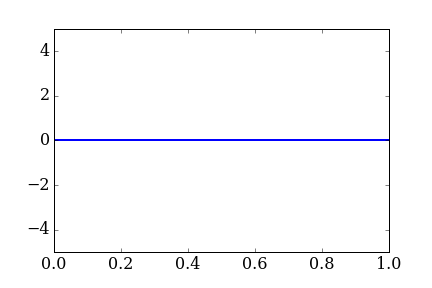
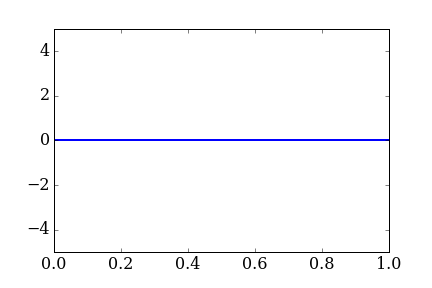
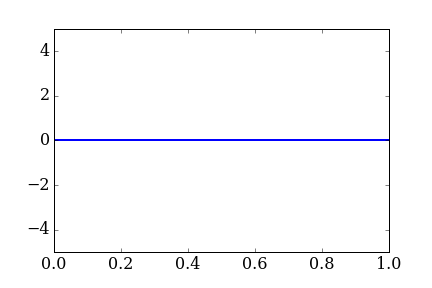
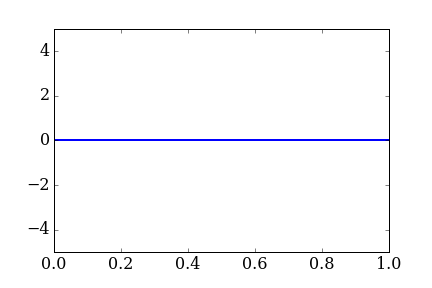
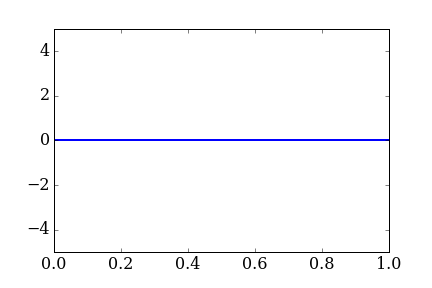
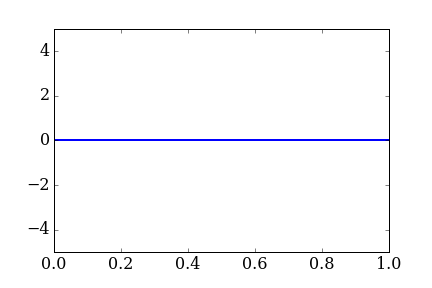
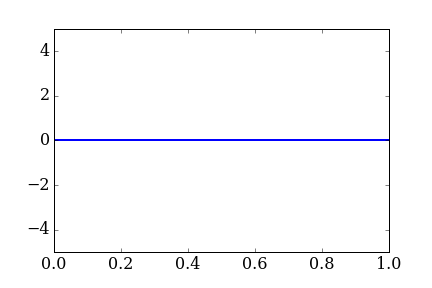
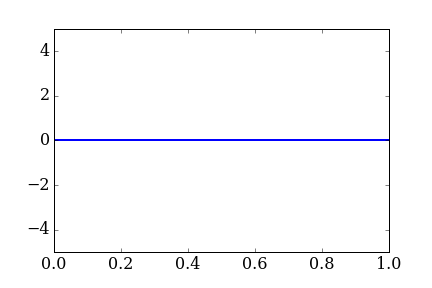
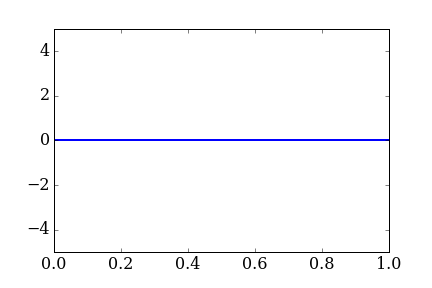
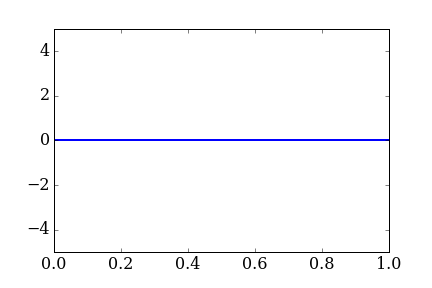
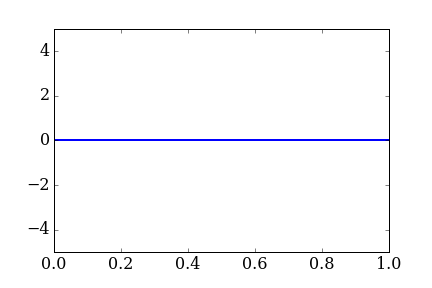
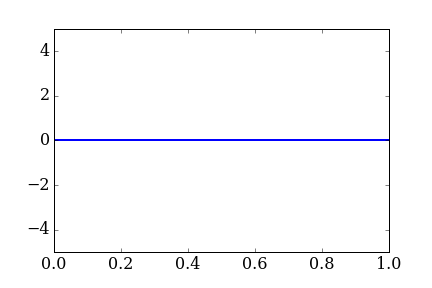
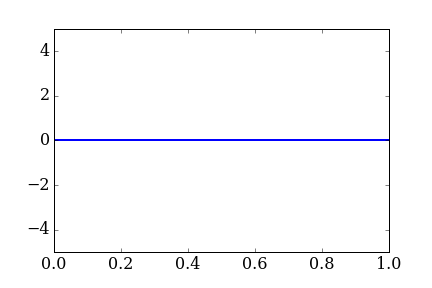
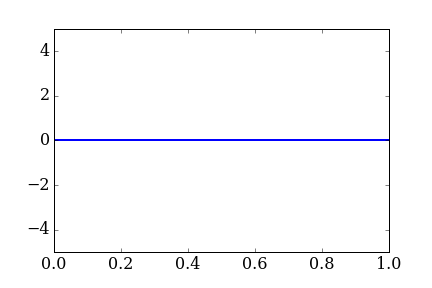
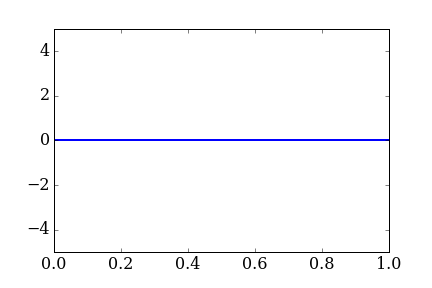
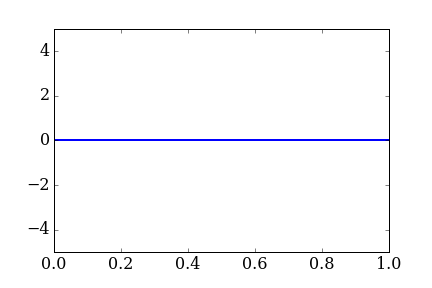
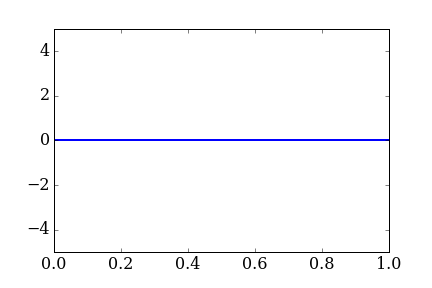
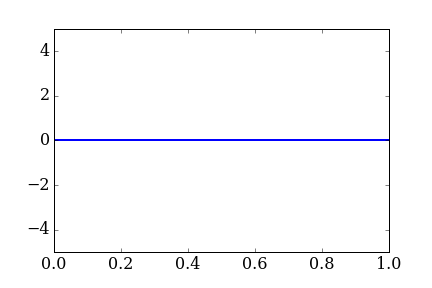
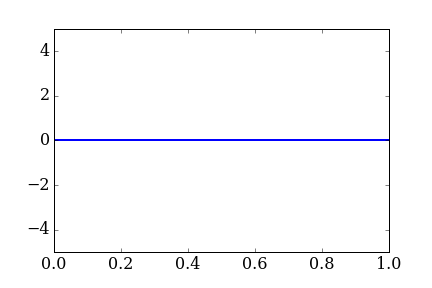
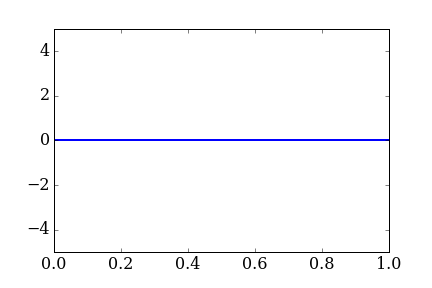
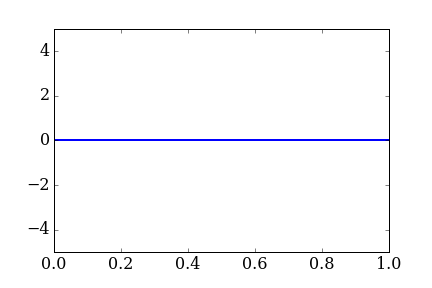
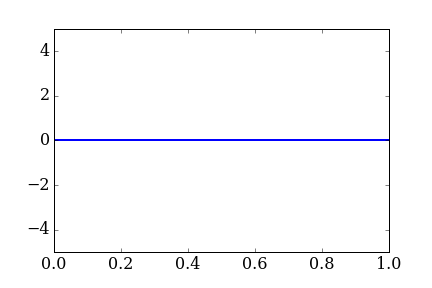
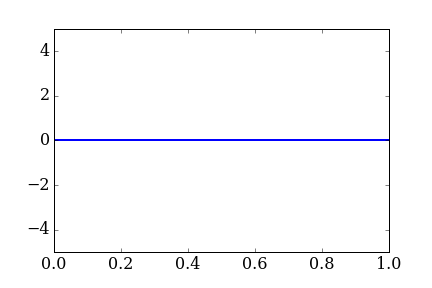
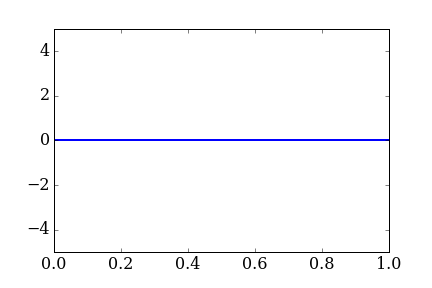
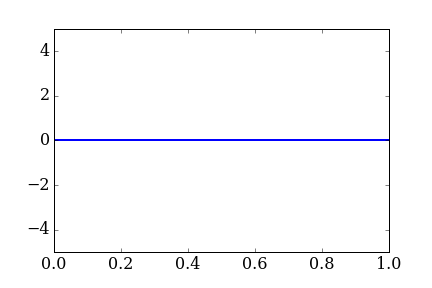
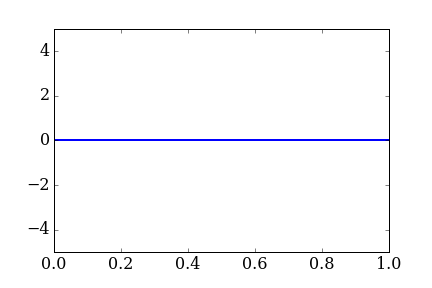

In [435]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,L), ylim = (-5,5))
line, = ax.plot([],[],lw = 2)

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = psi.real, interval = 50)

display_animation(anim, default_mode = 'once')

In [436]:
psi_conj = numpy.conj(psi)
probfunc = psi_conj*psi

#print(psi_conj)
#print()
print(probfunc)
probfunc_real = probfunc.real
#print(probfunc_real)

[  1.00000000e-06+0.j   1.79594076e-13+0.j   2.00328298e-13+0.j
   2.21528184e-13+0.j   2.43057881e-13+0.j   2.64779438e-13+0.j
   2.86553685e-13+0.j   3.08241125e-13+0.j   3.29702827e-13+0.j
   3.50801314e-13+0.j   3.71401443e-13+0.j   3.91371270e-13+0.j
   4.10582892e-13+0.j   4.28913268e-13+0.j   4.46245005e-13+0.j
   4.62467109e-13+0.j   4.77475694e-13+0.j   4.91174648e-13+0.j
   5.03476249e-13+0.j   5.14301722e-13+0.j   5.23581746e-13+0.j
   5.31256900e-13+0.j   5.37278036e-13+0.j   5.41606599e-13+0.j
   5.44214874e-13+0.j   5.45086159e-13+0.j   5.44214874e-13+0.j
   5.41606599e-13+0.j   5.37278036e-13+0.j   5.31256900e-13+0.j
   5.23581746e-13+0.j   5.14301722e-13+0.j   5.03476249e-13+0.j
   4.91174648e-13+0.j   4.77475694e-13+0.j   4.62467109e-13+0.j
   4.46245005e-13+0.j   4.28913268e-13+0.j   4.10582892e-13+0.j
   3.91371270e-13+0.j   3.71401443e-13+0.j   3.50801314e-13+0.j
   3.29702827e-13+0.j   3.08241125e-13+0.j   2.86553685e-13+0.j
   2.64779438e-13+0.j   2.43057881e-13+0

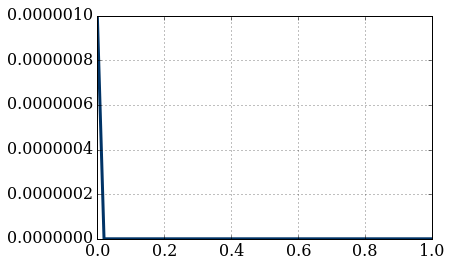

In [437]:
pyplot.plot(x, probfunc_real, color='#003366', ls='-', lw=3);
pyplot.grid(True)


In [438]:
def psi_analytical(x, t, n_max, h, m, L, hbar):
    
    psi = 0
    for n in range (1, n_max+1):
        
        E = ((n**2)*(h**2))/(8*m*(L**2))
        
        summation = numpy.sqrt(2/L)*numpy.sin(n*numpy.pi*x/L)*numpy.exp(-1j*E*t/hbar)
        psi+= summation
        
    return psi


In [439]:
psi_analytical = psi_analytical(x, dt*nt, 1, h, m, L, hbar)
print(psi_analytical)

print(psi_analytical.real)

[  0.00000000e+00 +0.00000000e+00j   8.87983500e-02 -3.89515648e-04j
   1.77246253e-01 -7.77494055e-04j   2.64994647e-01 -1.16240405e-03j
   3.51697228e-01 -1.54272656e-03j   4.37011820e-01 -1.91696064e-03j
   5.20601726e-01 -2.28362935e-03j   6.02137056e-01 -2.64128562e-03j
   6.81296025e-01 -2.98851794e-03j   7.57766230e-01 -3.32395595e-03j
   8.31245878e-01 -3.64627582e-03j   9.01444979e-01 -3.95420551e-03j
   9.68086488e-01 -4.24652975e-03j   1.03090740e+00 -4.52209488e-03j
   1.08965979e+00 -4.77981337e-03j   1.14411180e+00 -5.01866812e-03j
   1.19404852e+00 -5.23771648e-03j   1.23927287e+00 -5.43609396e-03j
   1.27960638e+00 -5.61301766e-03j   1.31488987e+00 -5.76778935e-03j
   1.34498408e+00 -5.89979821e-03j   1.36977026e+00 -6.00852326e-03j
   1.38915059e+00 -6.09353542e-03j   1.40304857e+00 -6.15449917e-03j
   1.41140936e+00 -6.19117393e-03j   1.41419996e+00 -6.20341495e-03j
   1.41140936e+00 -6.19117393e-03j   1.40304857e+00 -6.15449917e-03j
   1.38915059e+00 -6.09353542e-03j

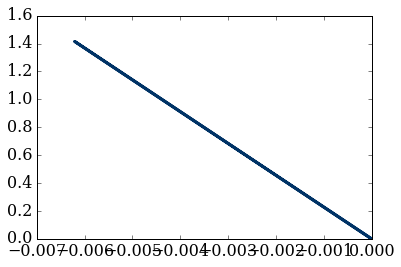

In [440]:
pyplot.plot(psi_analytical.imag, psi_analytical.real, color = '#003366', ls = '-', lw =3)

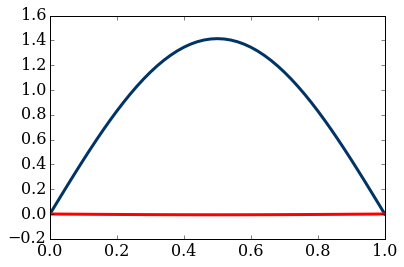

In [441]:
pyplot.plot(x, psi_analytical.real, color = '#003366', ls = '-', lw =3)
pyplot.plot(x, psi_analytical.imag, color = 'r', ls = '-', lw =3)

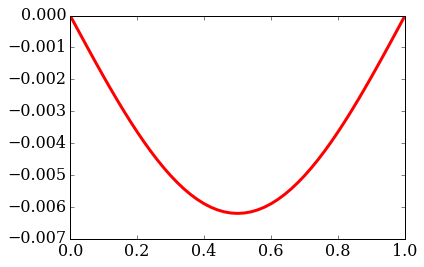

In [442]:
pyplot.plot(x, psi_analytical.imag, color = 'r', ls = '-', lw =3)

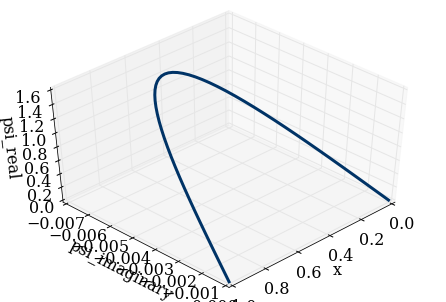

In [443]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init(45,45)

ax.plot(x, psi_analytical.imag, psi_analytical.real, color = '#003366', lw =3)
ax.set_xlabel(r'x')
ax.set_ylabel(r'psi_imaginary')
ax.set_zlabel(r'psi_real')
#ax = pyplot.axes(xlabel=('x'),ylabel=('Real'), zlabel=('Imaginary'));#

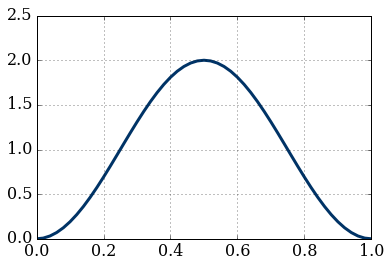

In [444]:
probfunc_analytical = numpy.conj(psi_analytical)*psi_analytical
pyplot.plot(x, probfunc_analytical.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

In [445]:
"""
fig = pylab.figure()
ax = Axes3D(fig)
ax.viewinit()

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = psi.real, interval = 50)

display_animation(anim, default_mode = 'once')
"""

"\nfig = pylab.figure()\nax = Axes3D(fig)\nax.viewinit()\n\ndef animate(data):\n    x = numpy.linspace(0, L, nx)\n    y = data\n    line.set_data(x, y)\n    return line,\n\nanim = animation.FuncAnimation(fig, animate, frames = psi.real, interval = 50)\n\ndisplay_animation(anim, default_mode = 'once')\n"